궁금한 지역(읍면동 단위)을 입력 : 신도림
[278 328 316 344 395 406 395 376 411 410 371 387 405 350 349 333 330 321
 326 386 400 365 394 446 499 435 470 439 464 476 473 570 563 593 619 602
 704 729 715 780 702 703 667 662 580 669 653 660 621 604 607 596 472 485
 513 550 441 496 468 544 494 490 444 417 415 431 369 355 338 239 285 267
 263 260 145 159 139 160 159 131 103 107  94  88  90  53  48  47  33  30
  12  21  15   7   9   9   5   7   1   2   8]


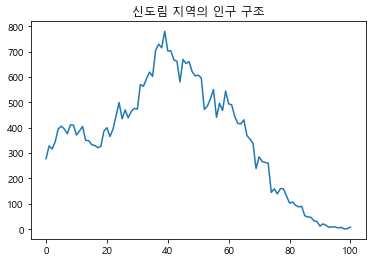

In [5]:
# numpy활용한 나만의 프로젝트
# 1. 관심있는 데이터 찾기
# 2. 데이터 살펴보며 질문하기
# 3. 질문을 명확한 문제로 정의하기
# 4. 알고리즘 설계하기(논리적 절차)
# 5. 알고리즘을 코드로 표현하기
# 우리동네 인구구조와 가장 비슷한 곳 찾기
# > 전국에서 신도림동의 연령별 인구 구조와 가장 형태가 비슷한 지역 찾기

# 알고리즘 코드로 표현
# 1. 데이터 읽어오기
import csv
import numpy as np
import matplotlib.pyplot as plt

f=open('age.csv')
data=csv.reader(f)
header=next(data)

name=input('궁금한 지역(읍면동 단위)을 입력 : ')
home=[] # 지역 data 저장 리스트
for row in data:
    if name in row[0]:
        #for i in row[3:]: # 기존 loop code
            #home.append(int(i.replace(',','')))
        home=np.array(row[3:],dtype=int) #np.array(list):list > ndarray, 3열 부터 끝까지, dtype=int는 저장할 때 data type을 int로 변환하라는 옵션
print(home)

plt.rc('font',family='Malgun Gothic')
plt.title(name+' 지역의 인구 구조')
plt.plot(home)
plt.show()

궁금한 지역(읍면동 단위)을 입력 : 신도림
0.08010724302738548


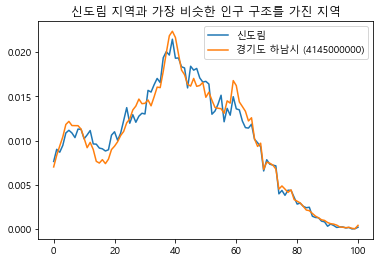

In [31]:
#가장 비슷한 인구 구조를 가진 지역 찾기 > 인구수 비율이 비슷한 지역
import csv
import numpy as np
import matplotlib.pyplot as plt

f=open('age.csv')
data=csv.reader(f)
header=next(data)
#기존 data는 for문 한번만 사용 가능해서 list로 변환해서 저장 후 여러번 읽기가 가능하게 한다.
data=list(data) # row들의 list

name=input('궁금한 지역(읍면동 단위)을 입력 : ')
min_v=1 #비율합 최솟값 
min_name='' #지역 이름
min_array=0 # 지역 인구 비율

#비교기준 지역 data 저장
for row in data:
    if name in row[0]: # 이름 찾기
        home=np.array(row[3:],dtype=int) / int(row[2]) #인구 비율 저장(row[2]:지역전체인구)  

#가장 비슷한 지역 찾기
for row in data:
    away=np.array(row[3:],dtype=int) / int(row[2]) #지역 인구 비율
    s=np.sum(abs(home-away)) #numpy sum : sum of array elements
    if s<min_v and name not in row[0]: #0에 가장 가까운 곳 저장
        min_v=s
        min_name=row[0]
        min_array=away
        
print(min_v)
plt.rc('font',family='Malgun Gothic')
plt.title(name+' 지역과 가장 비슷한 인구 구조를 가진 지역')
plt.plot(home, label=name)
plt.plot(min_array, label=min_name)
plt.legend()
plt.show()

기준이 될 지역 입력 : 신도림
0.7716550928744252


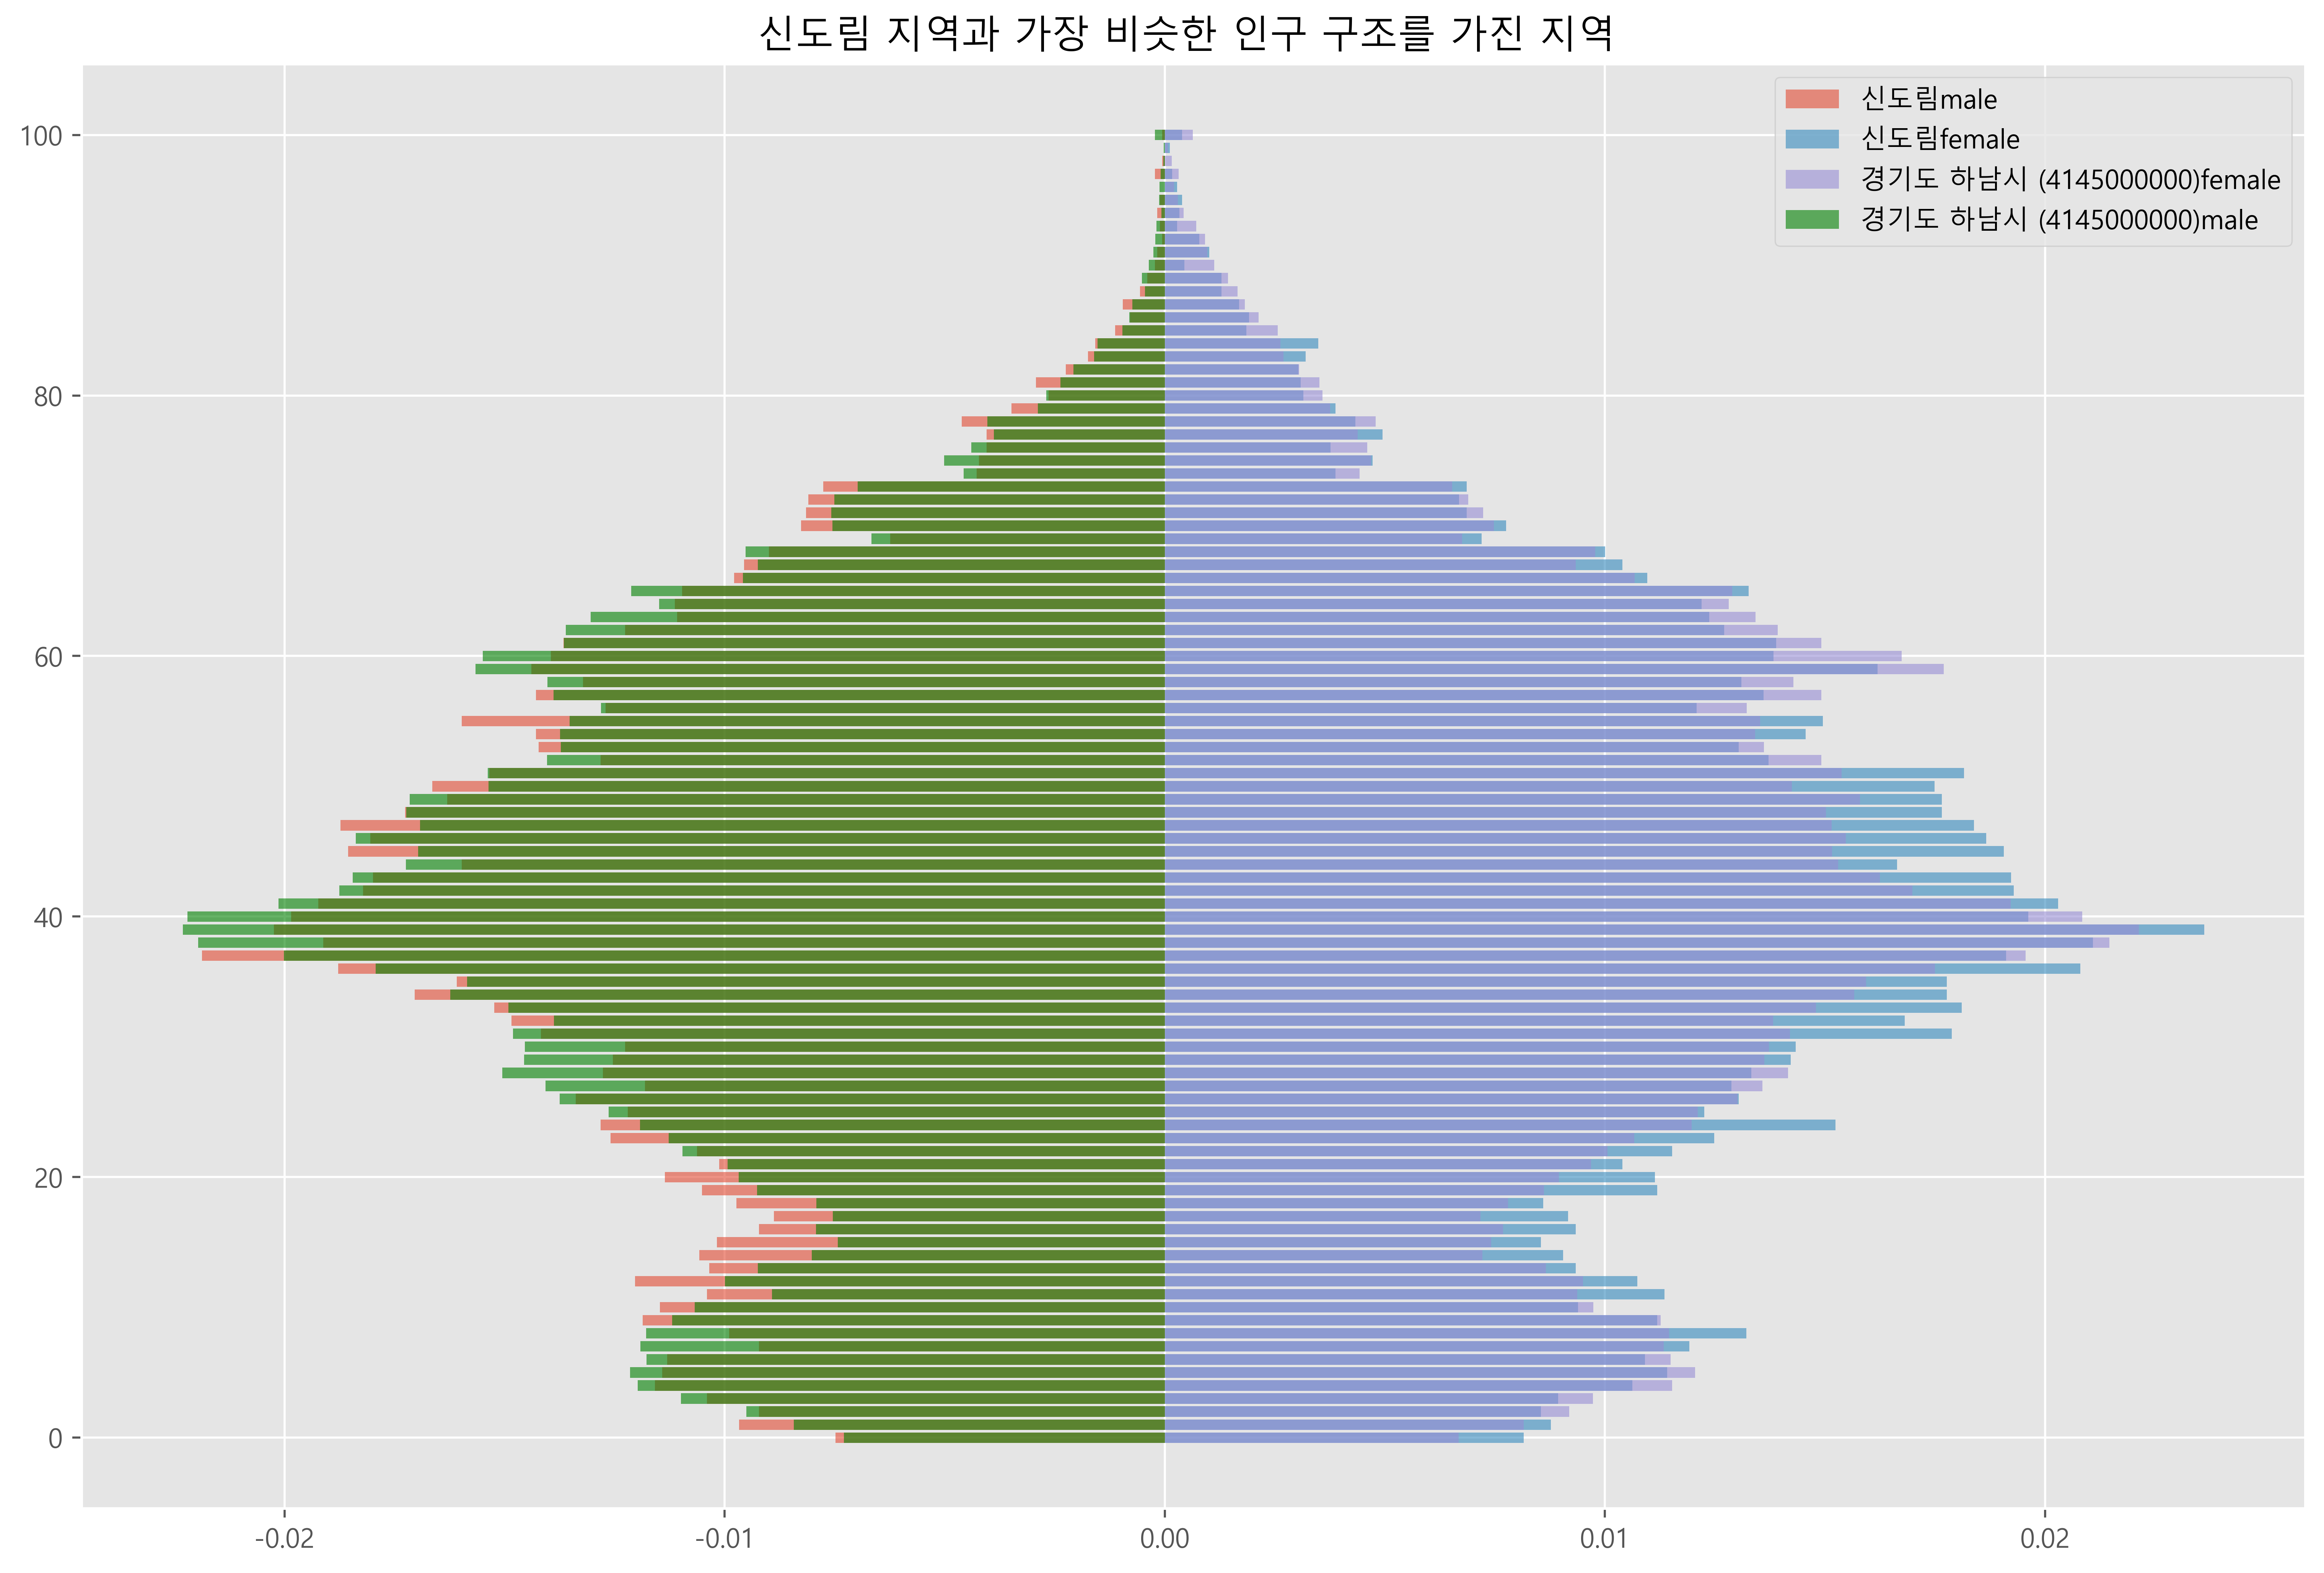

In [42]:
#성별 연령별 인구구조 비슷한 지역 찾기
import csv
import numpy as np
import matplotlib.pyplot as plt

f=open('gender.csv')
data=csv.reader(f)
header=next(data)
data=list(data) # row들의 list

name=input('기준이 될 지역 입력 : ')
min_v=100 #최소 차이값
min_name='' #지역이름
min_arr_f=0 #지역 비율
min_arr_m=0

#기준 지역 저장
for row in data:
    if name in row[0]:
        home_m=np.array(row[3:104], dtype=int) / int(row[2]) #남성
        home_f=np.array(row[106:106+101], dtype=int) / int(row[2]) #여성

for row in data:
    away_m=np.array(row[3:104], dtype=int) / int(row[2])
    away_f=np.array(row[106:106+101], dtype=int) / int(row[2])
    s_f=np.sum(abs(home_f-away_f)) #여성 연령별 비율 차이
    s_m=np.sum(abs(home_m-away_m)) # 남성 연령별 비율 차이
    s=s_f+s_m
    if s<min_v and name not in row[0]:
        min_v=s
        min_name=row[0]
        min_arr_f=away_f
        min_arr_m=away_m
    
print(s)

plt.rc('font',family='Malgun Gothic')
plt.figure(figsize=(15,10),dpi=500)
plt.style.use('ggplot')
plt.rcParams['axes.unicode_minus']=False #마이너스 기호 깨짐 방지

plt.title(name+' 지역과 가장 비슷한 인구 구조를 가진 지역 ')
plt.barh(range(101),-home_m, label=name+'male',alpha=0.6)
plt.barh(range(101),home_f, label=name+'female',alpha=0.6)
plt.barh(range(101),min_arr_f, label=min_name+'female',alpha=0.6)
plt.barh(range(101),-min_arr_m, label=min_name+'male',alpha=0.6,color='g')
plt.legend()
plt.show()